In [1]:
%run 'function_definitions.ipynb'

In [ ]:
# http://home.earthlink.net/~jimlux/nuc/sigma.htm

In [13]:
dd_data = np.loadtxt('./sigma_data/dd_sigma.dat')
dt_data = np.loadtxt('./sigma_data/dt_sigma.dat')

In [37]:
# sigma (in barns)= (A5 + A2/((A4-A3*E)^2+1))/(E*(exp(A1/sqrt(E))-1)
# E is the particle energy in keV and where the An are the "Duane coefficients" are given as:
def sigma_duane(E, A1, A2, A3, A4, A5):
    return (A5 + A2/((A4-A3*E)**2+1))/(E*(np.exp(A1/np.sqrt(E))-1))

params_dd = {
    'A1':47.88,
    'A2':482.,
    'A3':3.08e-4,
    'A4':1.177,
    'A5':0,
            }

params_dt = {
    'A1':45.95,
    'A2':50200,
    'A3':1.368e-2,
    'A4':1.076,
    'A5':409,
            }

def ratio(E):
    return sigma_duane(E, **params_dt) / sigma_duane(E, **params_dd)


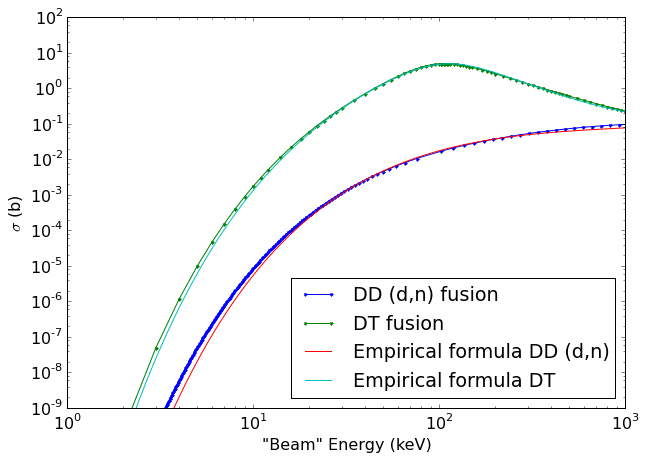

In [41]:
plt.plot(dd_data[:,0], dd_data[:,1], marker='.', label='DD (d,n) fusion')
plt.plot(dt_data[:,0], dt_data[:,1], marker='.', label='DT fusion')

plt.plot(np.logspace(0,3,100), [sigma_duane(x, **params_dd) 
                                for x in np.logspace(0,3,100)],
        label='Empirical formula DD (d,n)')

plt.plot(np.logspace(0,3,100), [sigma_duane(x, **params_dt) 
                                for x in np.logspace(0,3,100)],
        label='Empirical formula DT')



plt.yscale('log')
plt.ylim(1e-9,100)

plt.xscale('log')
plt.xlim(1,1000)

plt.xlabel('"Beam" Energy (keV)')
plt.ylabel('$\sigma$ (b)')
plt.legend(loc='lower right')

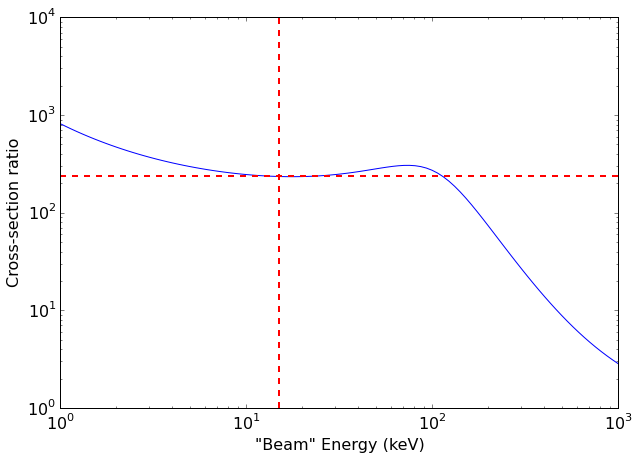

In [67]:
plt.plot(np.logspace(0,3,100), ratio(np.logspace(0,3,100)))
plt.axhline(ratio(15), color='red', ls='--', lw=2)
plt.axvline((15), color='red', ls='--', lw=2)

plt.yscale('log')
plt.ylim(1,10000)

plt.xscale('log')
plt.xlim(1,1000)

plt.xlabel('"Beam" Energy (keV)')
plt.ylabel('Cross-section ratio')
# plt.legend(loc='lower right')

In [60]:
# Settings for the calculation!
ratio_to_use = ratio(15.)
cyl_l = 25 # mm
cyl_r = 12.5 # mm
cyl_p = 1e-5 # bar
ratio_14mev = 0.05

# From literature
mol_vol = 24.789598 # dm^3/mol at stp
n_avg = 6.022140857e23

t_content = 1/ratio_to_use * ratio_14mev

cyl_v = np.pi*cyl_r**2 * cyl_l # mm^3
cyl_v = cyl_v / (100**3) # to liters
cyl_pv = cyl_v*cyl_p # to standard liters
n_mol = cyl_pv/mol_vol
n_d_atoms = 2*n_mol*n_avg
n_t_atoms = n_d_atoms*t_content


print("Technical data:")
print('Sigma ratio:     %f' % ratio_to_use)
print('Tritium content: %.4f %%' % (t_content*100))
print('Volume cylinder: %f dm^3' % cyl_v)
print('D2 content:      %g mole' % n_mol)
print('D atoms:         %g' % n_d_atoms)
print('T atoms:         %g' % n_t_atoms)

Technical data:
Sigma ratio:     234.817768
Tritium content: 0.0213 %
Volume cylinder: 0.012272 dm^3
D2 content:      4.9504e-09 mole
D atoms:         5.9624e+15
T atoms:         1.26958e+12


In [61]:
# Get run time @ some rate
neutron_production_rate = 10**5
buildup_time = n_t_atoms / neutron_production_rate

In [69]:
print('Predicted buildup time: %f days' % (buildup_time/86400))

Predicted buildup time: 146.942233 days
